In [145]:
import numpy as np
import pandas as pd
df=pd.read_csv('dataset.csv',encoding='latin-1')
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4081,ham,No no. I will check all rooms befor activities,NaN,NaN,NaN
886,ham,I like to talk pa but am not able to. I dont k...,NaN,NaN,NaN
3627,ham,Meeting u is my work. . . Tel me when shall i ...,NaN,NaN,NaN
1631,ham,We not watching movie already. Xy wants 2 shop...,NaN,NaN,NaN
2833,ham,U sick still can go shopping?,NaN,NaN,NaN
5421,ham,"Hi elaine, is today's meeting confirmed?",NaN,NaN,NaN
768,ham,I cant pick the phone right now. Pls send a me...,NaN,NaN,NaN
4937,ham,No it was cancelled yeah baby! Well that sound...,NaN,NaN,NaN
2203,ham,soon you will have the real thing princess! Do...,NaN,NaN,NaN
745,ham,Dunno he jus say go lido. Same time 930.,NaN,NaN,NaN


In [146]:
df.shape

(5577, 5)

## Data Preprocessing

### Data Cleaning

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5577 entries, 0 to 5576
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5577 non-null   object
 1   v2          5577 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 218.0+ KB


In [148]:
#unnamed:2,3,4 have a lot of null values so we will drop it
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [149]:
df.sample(10)

,v1,v2
4013,ham,"Sorry, I can't text &amp; drive coherently, se..."
2321,ham,Ok...
866,ham,"Same here, but I consider walls and bunkers an..."
269,spam,Ringtone Club: Get the UK singles chart on you...
1113,ham,"No I'm good for the movie, is it ok if I leave..."
4453,ham,I'm home. Ard wat time will u reach?
4209,ham,No da:)he is stupid da..always sending like th...
370,ham,Hello my boytoy ... Geeee I miss you already a...
5362,ham,I'm in inside office..still filling forms.don ...
4649,ham,Finally it has happened..! Aftr decades..! BEE...


In [150]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(10)

,target,text
4431,ham,Dont think you need yellow card for uk travel....
1459,spam,Bought one ringtone and now getting texts cost...
953,ham,Also remember to get dobby's bowl from your car
3158,ham,Are you up for the challenge? I know i am :)
827,ham,Hey. You got any mail?
1011,ham,"I just got home babe, are you still awake ?"
5335,ham,No. It's not pride. I'm almost &lt;#&gt; yea...
5420,ham,I dont know oh. Hopefully this month.
688,ham,Thanks love. But am i doing torch or bold.
5426,ham,Oh yeah! And my diet just flew out the window


### Data Transformation- Feature Construction

In [151]:
#using label encoder to convert target column to numeric
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Data reduction

In [152]:
#checking for missing values
df.isnull().sum()

,0
target,0
text,0


In [153]:
#checking for duplicate values
df.duplicated().sum()

np.int64(403)

In [154]:
df=df.drop_duplicates(keep='first')

In [155]:
df.duplicated().sum()

np.int64(0)

In [156]:
df.shape

(5174, 2)

## EDA(Exploratory data analysis)

In [157]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [158]:
df['target'].value_counts()

,count
target,
0,4516
1,658


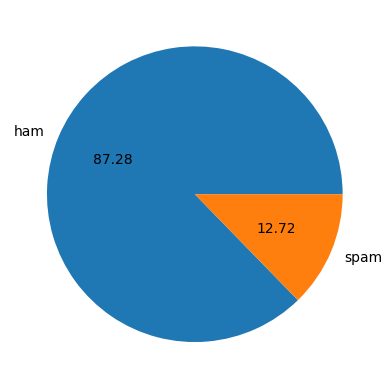

In [159]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [160]:
#this denotes imbalanced data
#next analysis on how many alphabets, words,sentences are there in our data
#for this analysis we'll make 3 new columns 1)no of characters in sms 2)no of words 3)no of sentences

In [161]:
%pip install nltk

In [162]:
import nltk

In [163]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [164]:
#counting no of characters
df['num_characters']=df['text'].apply(len)

In [165]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [166]:
#no of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [167]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [168]:
#no of sentences
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [169]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [170]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5174.000000,5174.000000,5174.00000
mean,79.276768,18.465211,1.96637
std,58.335186,13.323723,1.44826
min,2.000000,1.000000,1.00000
25%,36.000000,9.000000,1.00000
50%,61.000000,15.000000,1.00000
75%,117.750000,26.000000,2.00000
max,910.000000,220.000000,38.00000


In [171]:
#ham msg
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.684234,17.123782,1.820195
std,56.435582,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [172]:
#spam msg
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,658.00000,658.000000,658.000000
mean,138.24924,27.671733,2.969605
std,30.26371,7.011308,1.484261
min,13.00000,2.000000,1.000000
25%,132.00000,25.000000,2.000000
50%,149.00000,29.000000,3.000000
75%,158.00000,32.000000,4.000000
max,225.00000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

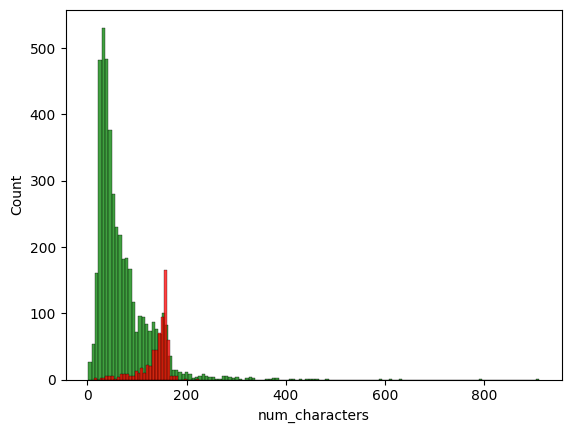

In [173]:
#plotting histogram for better representation
import seaborn as sns
sns.histplot(df[df['target']==0]['num_characters'],color='green')
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: >

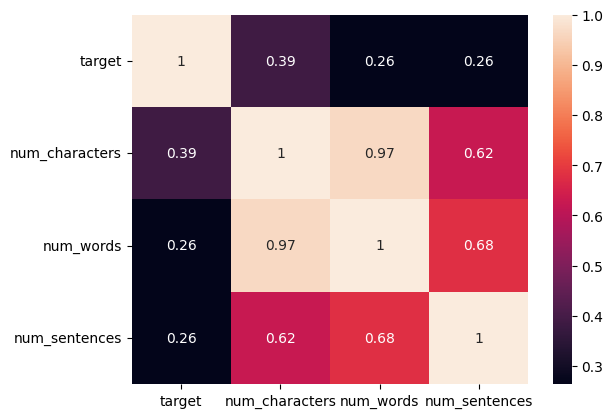

In [174]:
# Checking correlation using heatmap
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

In [175]:
#text preprocessing steps
#1. convert to lower case
#2. tokenization
#3. removing special chars
#4. remove stop words,punctuation
#5. stemming/lemmatization

In [176]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [177]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [178]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [179]:
def transform_text(text):

    from nltk.stem.porter import PorterStemmer
    ps=PorterStemmer()
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return y

In [180]:
transform_text('Am i a good person as i was walking on the wrong side of the road?')

['good', 'person', 'walk', 'wrong', 'side', 'road']

In [181]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('walking')

'walk'

In [182]:
df['transformed_text']=df['text'].apply(transform_text)

In [183]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"


## Model Building

In [184]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [185]:
df['transformed_text'] = df['transformed_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


In [186]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [187]:
X.shape

(5174, 3000)

In [188]:
y = df['target'].values

In [189]:
from sklearn.model_selection import train_test_split

In [190]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [191]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [192]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [193]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8454106280193237
[[767 135]
 [ 25 108]]
0.4444444444444444


In [194]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9739130434782609
[[901   1]
 [ 26 107]]
0.9907407407407407


In [195]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9826086956521739
[[900   2]
 [ 16 117]]
0.9831932773109243


In [196]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))